# Hellfire Random Enchantments

Showing data on the newest hellfire random enchantments. This build was tested by only using hellfire, talenting strictly into bonus spell damage, fire damage and spell crit talents while standing between the boss dummy and 3 mob dummies in Shattrath City. I was level 64 and not in spell caster gear besides for the staff.

![title](images/hellfire.png)

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as sklearn
from IPython.display import Image 
from IPython.display import HTML

dummy_int = 1
dummy_list = [2,22]
# backup copy, reads directly from the csv
hellfire_raw = pd.read_csv("hellfire_dps.csv")

#working copy
hellfire = hellfire_raw.copy()
hellfire.rename(columns={"Time (Minutes)": "Seconds"}, inplace = True)
hellfire.drop(["DPS Assumed", "Seconds"], axis=1, inplace=True)
hellfire.head()

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>The raw code for this Juypter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Graphs
I tested the each of the random enchants ten times each and recorded the damage. Each attempt is labeled as 'Trial' and damage per second as 'DPS'.

In [136]:
#splitting values
hellfire_basic = hellfire.loc[hellfire['Build'] == 'Basic']
hellfire_double = hellfire.loc[hellfire['Build'] == 'Double']
hellfire_demon = hellfire.loc[hellfire['Build'] == 'Demon']
hellfire_dup = hellfire.loc[hellfire['Build'] == 'Duplicate']

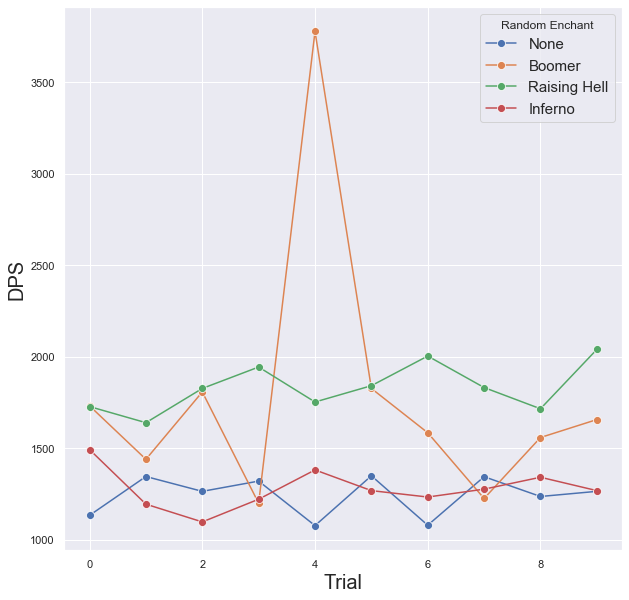

In [194]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True)
ten_intervals = range(0,10)
#ax_intervals =[ax[0,0], ax[0,1], ax[1,0], ax[1,1]]


plot = [hellfire_basic, hellfire_double, hellfire_demon, hellfire_dup]
titles = ["None", "Boomer", "Raising Hell", "Inferno"]

for plot_num in range(len(plot)):
    local_plot = plot[plot_num]
    local_plot.reset_index()
    
    sns.lineplot(x=ten_intervals, y="DPS", data=local_plot, ax = ax)
    ax.lines[plot_num].set_marker("o")
    ax.lines[plot_num].set_markersize(8)


sns.set(style="darkgrid")
plt.ylabel('DPS', fontsize=20)
plt.xlabel('Trial', fontsize=20)
ax.legend(['None', 'Boomer', 'Raising Hell', 'Inferno'], title='Random Enchant', prop={'size': 15})
  
plt.show()

In [196]:
dps_median = []
dps_mean = []
#dps_median[plot_num] = np.median(plot[plot_num]['DPS'])

for plot_num in range(len(plot)):
    dps_median.append(1)
    dps_median[plot_num] = np.median(plot[plot_num]['DPS'])
    
    dps_mean.append(1)
    dps_mean[plot_num] = np.mean(plot[plot_num]['DPS'])
    print(titles[plot_num] + " has an average DPS of", dps_mean[plot_num]) 
    


None has an average DPS of 1242.1
Boomer has an average DPS of 1781.1
Raising Hell has an average DPS of 1832.6
Inferno has an average DPS of 1278.1
